In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [12]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [13]:
pd.set_option("display.max_columns", None)

In [24]:
username = "root"
password = quote_plus("Jack@Sparrow01")
host = "localhost"
port = 3306
database = "subscription_analysis"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}"
)

# Load table into pandas
df = pd.read_sql("SELECT * FROM subscriptions", engine)

df.head()

,customer_id,start_date,tenure_months,monthly_charges,usage_frequency,support_tickets,auto_renew,payment_method,contract_type,churn
0,10001,2025-04-13,18,529.16,11.0,1.0,0,Net Banking,Quarterly,0
1,10002,2025-12-15,21,498.81,11.0,1.0,1,UPI,Quarterly,0
2,10003,2025-09-28,17,452.82,2.0,0.0,1,Net Banking,Monthly,1
3,10004,2025-04-17,7,554.68,5.0,0.0,1,UPI,Yearly,0
4,10005,2025-03-13,17,446.37,5.0,2.0,0,UPI,Quarterly,0


In [25]:
df.shape

(1127, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1127 non-null   int64  
 1   start_date       1127 non-null   object 
 2   tenure_months    1127 non-null   int64  
 3   monthly_charges  1127 non-null   float64
 4   usage_frequency  1127 non-null   float64
 5   support_tickets  1127 non-null   float64
 6   auto_renew       1127 non-null   int64  
 7   payment_method   1127 non-null   object 
 8   contract_type    1127 non-null   object 
 9   churn            1127 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 88.2+ KB


In [27]:
df.describe()

,customer_id,tenure_months,monthly_charges,usage_frequency,support_tickets,auto_renew,churn
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,10599.299024,11.952085,497.141606,7.956522,1.522626,0.687666,0.234250
std,344.575369,6.640837,117.021858,2.651597,1.253476,0.463651,0.423717
min,10001.000000,1.000000,199.000000,1.000000,0.000000,0.000000,0.000000
25%,10305.500000,6.000000,415.985000,6.000000,1.000000,0.000000,0.000000
50%,10595.000000,12.000000,499.820000,8.000000,1.000000,1.000000,0.000000
75%,10896.500000,18.000000,575.970000,10.000000,2.000000,1.000000,0.000000
max,11200.000000,23.000000,826.700000,16.000000,6.000000,1.000000,1.000000


In [35]:
df.isnull().sum()

customer_id        0
start_date         0
tenure_months      0
monthly_charges    0
usage_frequency    0
support_tickets    0
auto_renew         0
payment_method     0
contract_type      0
churn              0
dtype: int64

In [36]:
(df.isnull().mean()*100).round(2)

customer_id        0.0
start_date         0.0
tenure_months      0.0
monthly_charges    0.0
usage_frequency    0.0
support_tickets    0.0
auto_renew         0.0
payment_method     0.0
contract_type      0.0
churn              0.0
dtype: float64

In [37]:
df['tenure_months'].fillna(df['tenure_months'].median(), inplace=True)
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)

C:\Users\Dhongade\AppData\Local\Temp\ipykernel_7132\2669471585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure_months'].fillna(df['tenure_months'].median(), inplace=True)
C:\Users\Dhongade\AppData\Local\Temp\ipykernel_7132\2669471585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [38]:
df.duplicated().sum()

np.int64(0)

In [40]:
df = df.drop_duplicates()

In [41]:
df["churn"].describe()

count    1127.000000
mean        0.234250
std         0.423717
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [42]:
df["churn"].value_counts()

churn
0    863
1    264
Name: count, dtype: int64

In [43]:
df["churn"].value_counts(normalize=True) * 100

churn
0    76.574978
1    23.425022
Name: proportion, dtype: float64

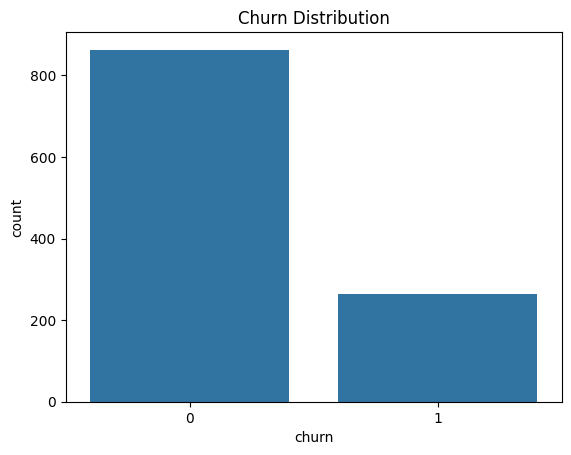

In [44]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

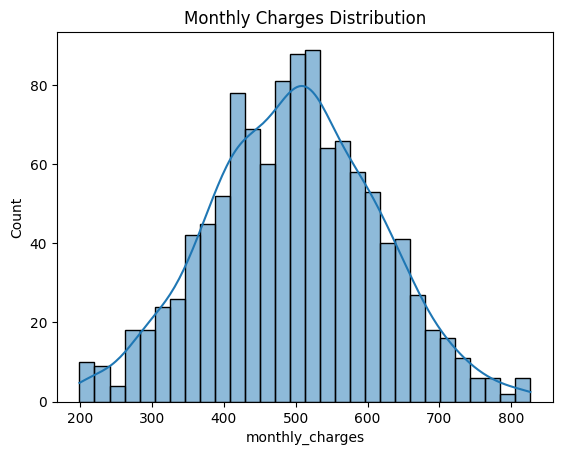

In [48]:
sns.histplot(df["monthly_charges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

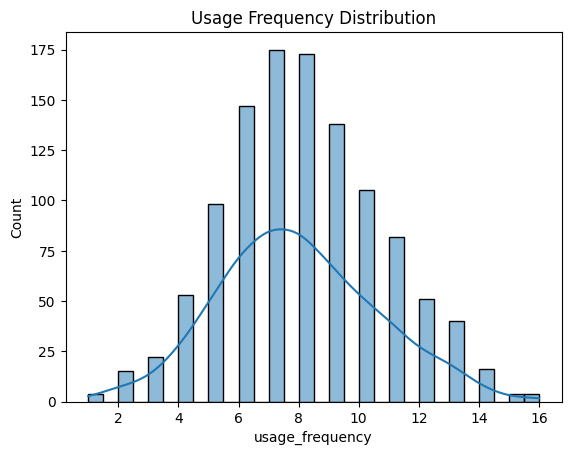

In [49]:
sns.histplot(df["usage_frequency"], bins=30, kde=True)
plt.title("Usage Frequency Distribution")
plt.show()

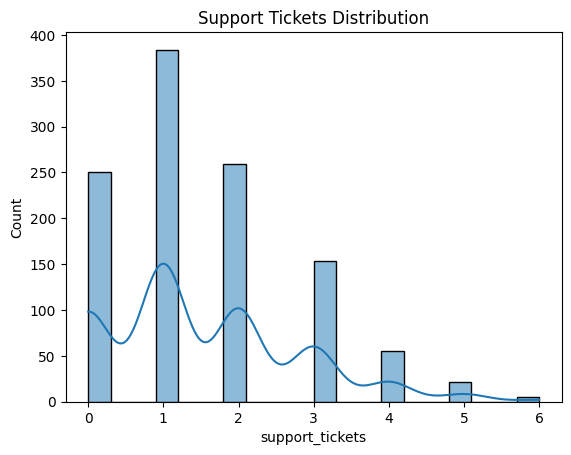

In [50]:
sns.histplot(df["support_tickets"], bins=20, kde=True)
plt.title("Support Tickets Distribution")
plt.show()

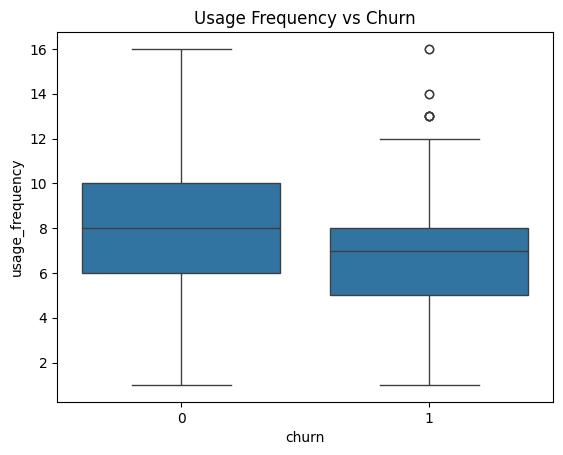

In [51]:
sns.boxplot(x="churn", y="usage_frequency", data=df)
plt.title("Usage Frequency vs Churn")
plt.show()

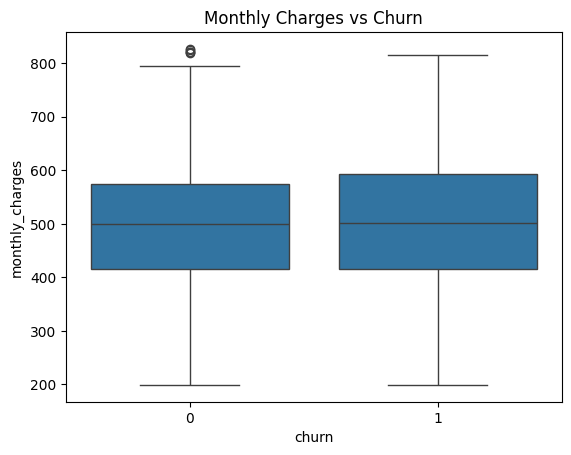

In [52]:
sns.boxplot(x="churn", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [53]:
pd.crosstab(df["contract_type"], df["churn"], normalize="index")

churn,0,1
contract_type,,
Monthly,0.669039,0.330961
Quarterly,0.821326,0.178674
Yearly,0.926606,0.073394


In [54]:
df["start_date"] = pd.to_datetime(df["start_date"])
df["cohort_month"] = df["start_date"].dt.to_period("M")

In [55]:
df[["start_date", "cohort_month"]].head()

,start_date,cohort_month
0,2025-04-13,2025-04
1,2025-12-15,2025-12
2,2025-09-28,2025-09
3,2025-04-17,2025-04
4,2025-03-13,2025-03


In [56]:
df["monthly_charges"].fillna(df["monthly_charges"].median(), inplace=True)
df["usage_frequency"].fillna(df["usage_frequency"].median(), inplace=True)
df["support_tickets"].fillna(0, inplace=True)

C:\Users\Dhongade\AppData\Local\Temp\ipykernel_7132\4021372628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_charges"].fillna(df["monthly_charges"].median(), inplace=True)
C:\Users\Dhongade\AppData\Local\Temp\ipykernel_7132\4021372628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

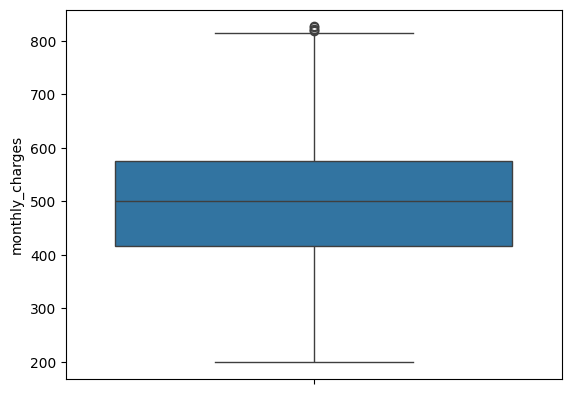

In [57]:
sns.boxplot(df["monthly_charges"])
plt.show()

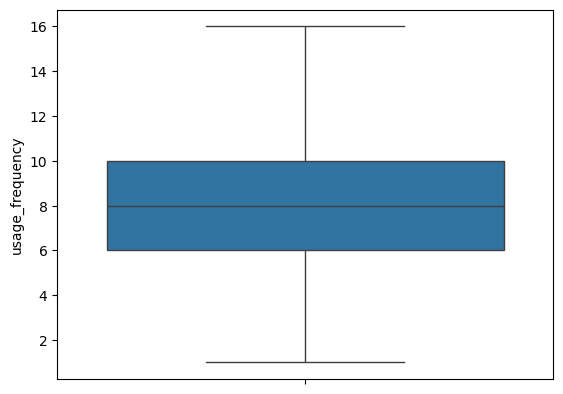

In [58]:
sns.boxplot(df["usage_frequency"])
plt.show()

In [59]:
df.isnull().sum()

customer_id        0
start_date         0
tenure_months      0
monthly_charges    0
usage_frequency    0
support_tickets    0
auto_renew         0
payment_method     0
contract_type      0
churn              0
cohort_month       0
dtype: int64

In [60]:
df.describe()

,customer_id,start_date,tenure_months,monthly_charges,usage_frequency,support_tickets,auto_renew,churn
count,1127.000000,1127,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,10599.299024,2025-07-02 00:58:46.530612224,11.952085,497.141606,7.956522,1.522626,0.687666,0.234250
min,10001.000000,2025-01-01 00:00:00,1.000000,199.000000,1.000000,0.000000,0.000000,0.000000
25%,10305.500000,2025-04-09 00:00:00,6.000000,415.985000,6.000000,1.000000,0.000000,0.000000
50%,10595.000000,2025-06-29 00:00:00,12.000000,499.820000,8.000000,1.000000,1.000000,0.000000
75%,10896.500000,2025-09-30 12:00:00,18.000000,575.970000,10.000000,2.000000,1.000000,0.000000
max,11200.000000,2025-12-31 00:00:00,23.000000,826.700000,16.000000,6.000000,1.000000,1.000000
std,344.575369,NaN,6.640837,117.021858,2.651597,1.253476,0.463651,0.423717


In [61]:
df.to_csv("../data/processed/subscription_churn_clean.csv", index=False)